In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(6,4))

UsageError: Line magic function `%` not found.


In [4]:
df = pd.read_json('ultimate_challenge/logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.describe()

<ipython-input-5-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Part 1

In [6]:
#using a timedelta of 15 min, count how many logins fall in that time period. create new series of counts versus periods.
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng)

In [7]:
df = df.sort_values('login_time') # the login times were not in order, so this gets them aright.
df = df.reset_index(drop=True)
df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [8]:
p = 0 
for i in range(len(log_df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = log_df['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

<AxesSubplot:>

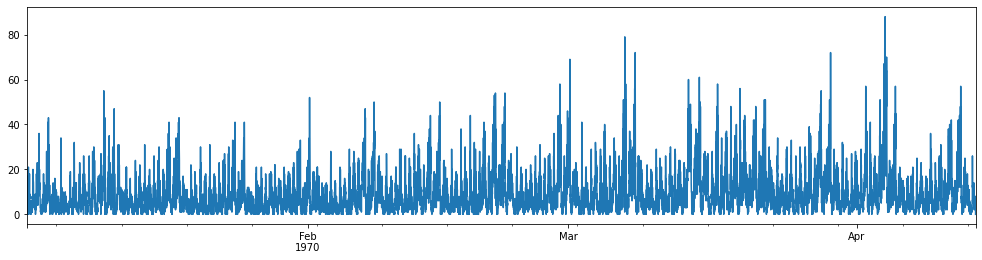

In [9]:
plt.figure(figsize=(17,4)) # The entire data set
ts.plot()

<AxesSubplot:>

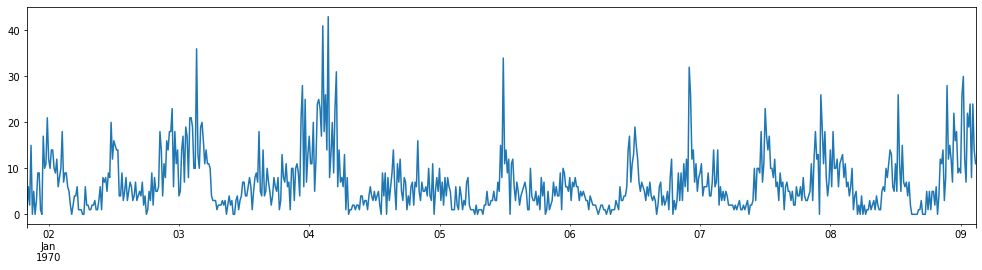

In [10]:
plt.figure(figsize=(17,4))# 1st week plot
ts[0:700].plot()

In [11]:
ts.max()

88.0

In [13]:
ts[ts == 88].index[0].dayofweek

5

# Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? I would choose weekend engagement for drivers in the city other than their primary weekday city. With the huge difference in peak times during the weekdays, it is unlikely that any driver would take advantage of both cities as that would equate to working more than 12 hours a day. However, with weekends being active for both throughout the day, it is more reasonable to expect a driver to take customers back and forth with tolls not being an issue.
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. Prior to any announcements, I would track drivers' (I'm not sure how large the driver pool is, but tracking all of them initially would be helpful) city habits both on weekdays and weekends. Which cities are they spending the majority of their time, or are they split. Then I would inform all of them (the prior weeks serves as the control and it would be difficult to be sure drivers did not share the information if only a selection were chosen) of the changed toll policy. Again, their trips per city would be tracked. It would be especially noteworthy to note how many times the city location changes per day. I would use a t-test to compare the average number of trips back and forth as well as trips in the non-weekday city. I would also compute an effect size as the number of trips may make it easy to find significance so that we know if the difference is meaningful. If the the effect size is greater than .25 I would then compute an actual cost analysis to see if the cost of the program is outweighed by the extra money brought in. With both of those true I would encourage the policy to be made permanent.

# Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3.Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [15]:
with open('ultimate_challenge/ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [18]:
ultimate_df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [19]:
ultimate_df['last_trip_date'][0] 

'2014-06-17'

In [20]:
#this sequence runs through the dataframe, creates a date six months from the start date, and then checks if the last trip falls
#within a 30 days of that time. Then it ouputs a 1 or 0 to a list of active users.

active_users = []
for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [21]:
df1 = pd.DataFrame(active_users,columns = ['active_users'])

In [22]:
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [23]:
12198/50000*100

24.396

In [24]:
#Not complete ...